In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
#df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx')
df = pd.read_excel ('C:/Users/Owner/OneDrive/Documents/Dil Mil Review.xlsx')
# adding an row_id field to the dataframe, which will be useful for joining later
df["row_id"] = df.index + 1
#print first 10 rows 
print (df.head(10))

                                            Response  row_id
0  pros: they are adding more features. I really ...       1
1  I am in LOVE with this app. Ive never tried a ...       2
2  It's okay, wish it had an option to set a dist...       3
3  It’s a good idea but needs lot of tweaks. The ...       4
4  I always thought these dating apps are a mimic...       5
5  If you are worried about fake accounts, facebo...       6
6  I have all the good things to say about the ap...       7
7  This app is solid in theory and clearly someon...       8
8  For over a year, I’ve been trying to get the s...       9
9  I had a great experience with using Dil Mil! I...      10


In [3]:
#create a new data frame with "id" and "comment" fields
df_subset = df[['row_id', 'Response']].copy()
#data clean-up
#remove all non-aphabet characters
df_subset['Response'] = df_subset['Response'].str.replace("[^a-zA-Z#]", " ")
#covert to lower-case
df_subset['Response'] = df_subset['Response'].str.casefold()
print (df_subset.head(10))

   row_id                                           Response
0       1  pros  they are adding more features  i really ...
1       2  i am in love with this app  ive never tried a ...
2       3  it s okay  wish it had an option to set a dist...
3       4  it s a good idea but needs lot of tweaks  the ...
4       5  i always thought these dating apps are a mimic...
5       6  if you are worried about fake accounts  facebo...
6       7  i have all the good things to say about the ap...
7       8  this app is solid in theory and clearly someon...
8       9  for over a year  i ve been trying to get the s...
9      10  i had a great experience with using dil mil  i...


C:\Users\Owner\AppData\Local\Temp/ipykernel_20236/378196962.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_subset['Response'] = df_subset['Response'].str.replace("[^a-zA-Z#]", " ")


In [4]:
# set up empty dataframe for staging output
df1=pd.DataFrame()
df1['row_id']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

In [5]:
print('Processing sentiment analysis...')
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['row_id']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df=t_df.append(df1)
#remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
print(t_df_cleaned.head(10))

Processing sentiment analysis...
   row_id sentiment_type  sentiment_score
0       1       compound           0.8802
0       2       compound           0.8837
0       3       compound          -0.2382
0       4       compound           0.8272
0       5       compound           0.9432
0       6       compound          -0.9264
0       7       compound           0.9768
0       8       compound          -0.8899
0       9       compound           0.9565
0      10       compound           0.9784


In [6]:
#merge dataframes
df_output = pd.merge(df, t_df_cleaned, on='row_id', how='inner')
print(df_output.head(10))

                                            Response  row_id sentiment_type  \
0  pros: they are adding more features. I really ...       1       compound   
1  I am in LOVE with this app. Ive never tried a ...       2       compound   
2  It's okay, wish it had an option to set a dist...       3       compound   
3  It’s a good idea but needs lot of tweaks. The ...       4       compound   
4  I always thought these dating apps are a mimic...       5       compound   
5  If you are worried about fake accounts, facebo...       6       compound   
6  I have all the good things to say about the ap...       7       compound   
7  This app is solid in theory and clearly someon...       8       compound   
8  For over a year, I’ve been trying to get the s...       9       compound   
9  I had a great experience with using Dil Mil! I...      10       compound   

   sentiment_score  
0           0.8802  
1           0.8837  
2          -0.2382  
3           0.8272  
4           0.9432  
5   

In [7]:
df_output[["sentiment_score"]].describe()

,sentiment_score
count,40.000000
mean,0.302465
std,0.720139
min,-0.926400
25%,-0.437500
50%,0.730100
75%,0.902800
max,0.997200


<AxesSubplot:>

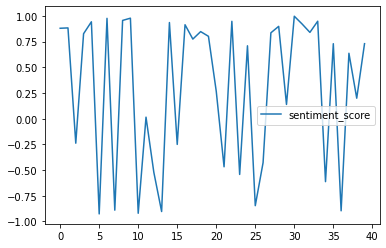

In [8]:
df_output[["sentiment_score"]].plot()